# Introduction to Deep Learning 67822 - [Ex2](https://docs.google.com/document/d/1HdHzN-z-TDoVNHxM_3NR1WWvFvxM1H6sm1HyncPvcCA/edit?pli=1&tab=t.0)

## Programming Tasks
Classifying and encoding the MNISTdigit dataset.

The MNIST dataset consists of 60,000 (+10,000 test) small images of scanned hand-written digits (0-9). The dataset contains the digits values as labels. The original images are 28-by-28 pixels. The images are monochromatic, i.e., have a single brightness channel with values between zero (black) and one (white).

In this exercise we will design and train both autoencoding and classification CNN networks.

Specific tasks:
For every section that includes training, paste the code of the training loop at the end of the section. If there are inner functions, you don’t need to paste them, as long they have clear, informative names.  

### Imports & Setup

In [36]:
# Sagie's imports:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import os
import random

# Nathan's imports:
from mnistlib.data import *
from mnistlib.models import *
from mnistlib.train import *
from mnistlib.train import *
from mnistlib.viz import *

# Create directories for saving models
models_root_dir = './models'
os.makedirs(models_root_dir, exist_ok=True)

### 1
**Autoencoder**. Define a convolutional autoencoder to encode (and decode) the images through a small dimensional latent space.

#### a
How will you make the architecture flexible enough to choose any latent dim d, regardless of the number of channels chosen?

In [37]:
# no training yet – just instantiation to prove flexibility
train_dataset, test_dataset = get_mnist_loaders(batch_size=256)

autoencoder_4x4  = ConvolutionalAutoencoder(base_channel_count=4 , latent_dimension=4)
autoencoder_16x16 = ConvolutionalAutoencoder(base_channel_count=16, latent_dimension=16)

torch.save(autoencoder_4x4.state_dict(), os.path.join(models_root_dir, 'Ex2_Q1_a_autoencoder_4x4.pt'))
torch.save(autoencoder_16x16.state_dict(), os.path.join(models_root_dir, 'Ex2_Q1_a_autoencoder_16x16.pt'))

The constructor of `convolutional_autoencoder` takes two knobs:

* `base_c`=`base_channel_count` – number of channels in the first conv layer  
  ↳ determines the entire feature-width pyramid (`base_c`, `2×`, `4×`).
* `d_latent`=`latent_dimension` – the dimensionality of the bottleneck vector.

Because the two hyper-parameters are independent, *any* (base_channel_count, latent_dimension) pair is legal without touching internal code.

#### b
Explore two network configurations, one with a small number of channels (around 4 in the first layer, and similar numbers in the following layers) and a larger one (around 16 in the first layer) and report these tests as well; input vs. reconstructed images and the reconstruction loss obtained.


=== Training small_latent_dimension_4 (base_channel_count (base_c)=4, latent_dimension (d_latent)=4) ===
[01/10]  train L1=0.2700  train accuracy=0.2955  validation L1=0.1426  validation accuracy=0.6429  (11.8s)
[05/10]  train L1=0.0966  train accuracy=0.7901  validation L1=0.0959  validation accuracy=0.7934  (14.5s)
[10/10]  train L1=0.0834  train accuracy=0.8003  validation L1=0.0829  validation accuracy=0.7971  (12.1s)


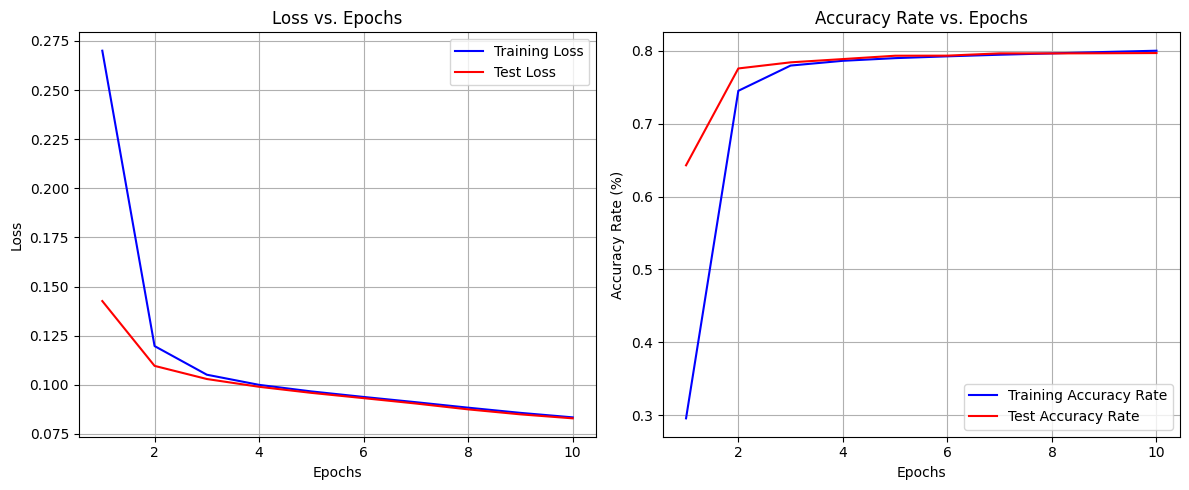

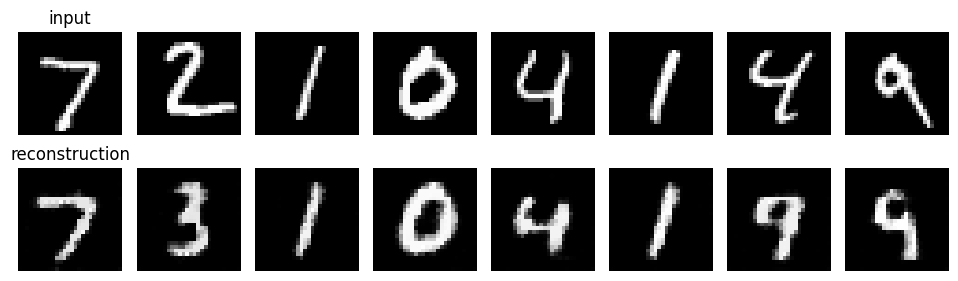

Saved model: Ex2_Q1_b_small_latent_dimension_4_base_c=4_d_latent=4.pt
Final validation loss: 0.0829

=== Training small_latent_dimension_16 (base_channel_count (base_c)=4, latent_dimension (d_latent)=16) ===
[01/10]  train L1=0.2549  train accuracy=0.2939  validation L1=0.1324  validation accuracy=0.6764  (14.0s)
[05/10]  train L1=0.0752  train accuracy=0.8159  validation L1=0.0729  validation accuracy=0.8169  (11.5s)
[10/10]  train L1=0.0529  train accuracy=0.8324  validation L1=0.0514  validation accuracy=0.8332  (11.0s)


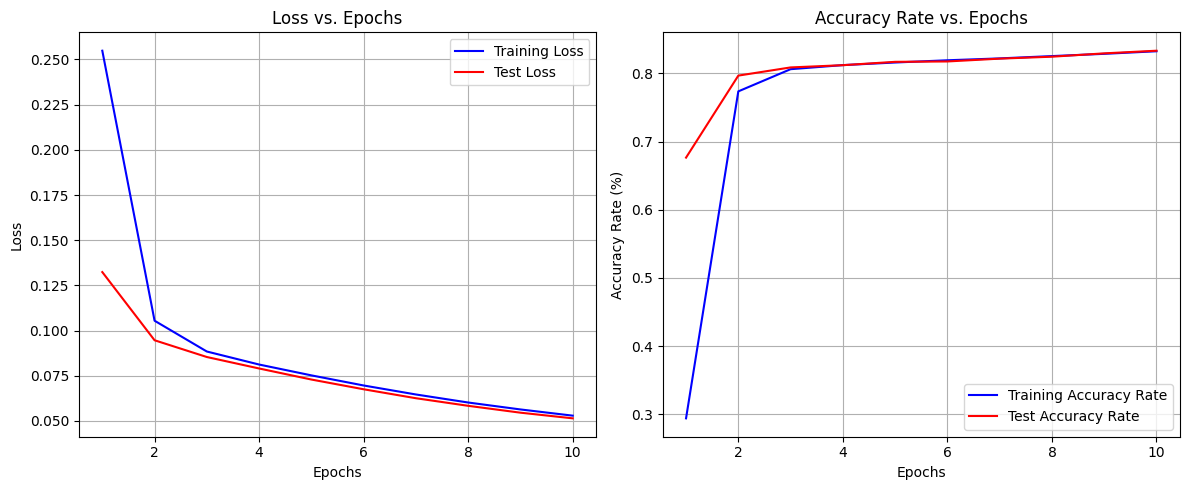

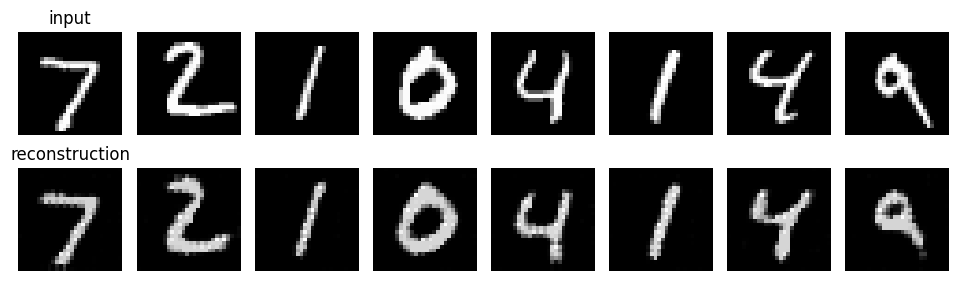

Saved model: Ex2_Q1_b_small_latent_dimension_16_base_c=4_d_latent=16.pt
Final validation loss: 0.0514

=== Training big_latent_dimension_4 (base_channel_count (base_c)=16, latent_dimension (d_latent)=4) ===
[01/10]  train L1=0.1612  train accuracy=0.5965  validation L1=0.0910  validation accuracy=0.7958  (20.7s)
[05/10]  train L1=0.0664  train accuracy=0.8607  validation L1=0.0672  validation accuracy=0.8592  (19.2s)
[10/10]  train L1=0.0628  train accuracy=0.8669  validation L1=0.0626  validation accuracy=0.8678  (17.2s)


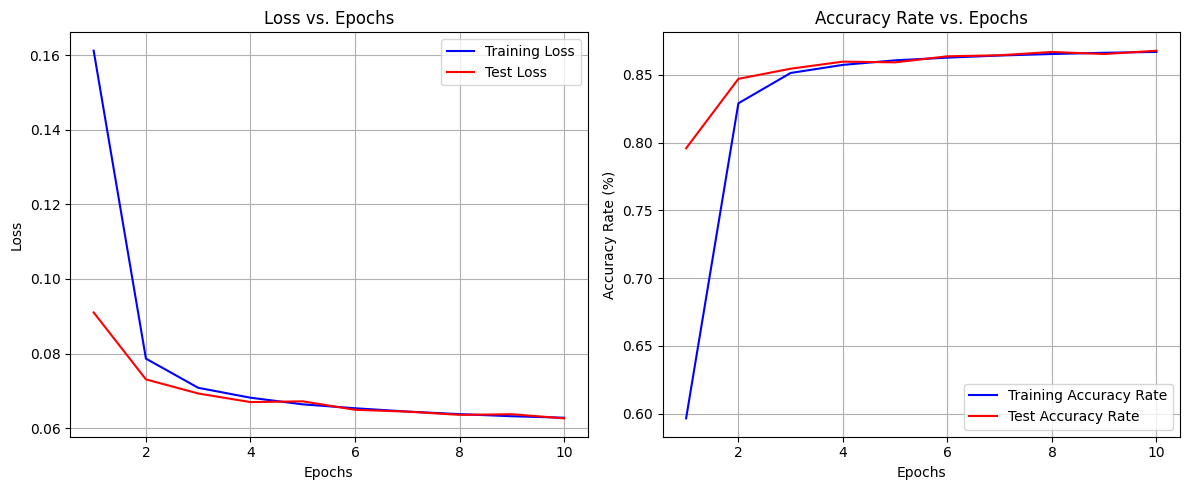

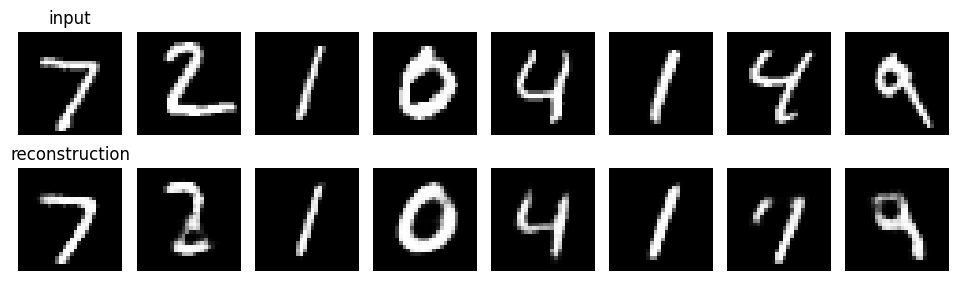

Saved model: Ex2_Q1_b_big_latent_dimension_4_base_c=16_d_latent=4.pt
Final validation loss: 0.0626

=== Training big_latent_dimension_16 (base_channel_count (base_c)=16, latent_dimension (d_latent)=16) ===
[01/10]  train L1=0.1334  train accuracy=0.6271  validation L1=0.0508  validation accuracy=0.8783  (17.1s)
[05/10]  train L1=0.0318  train accuracy=0.9110  validation L1=0.0308  validation accuracy=0.9125  (17.6s)
[10/10]  train L1=0.0288  train accuracy=0.9164  validation L1=0.0285  validation accuracy=0.9167  (28.1s)


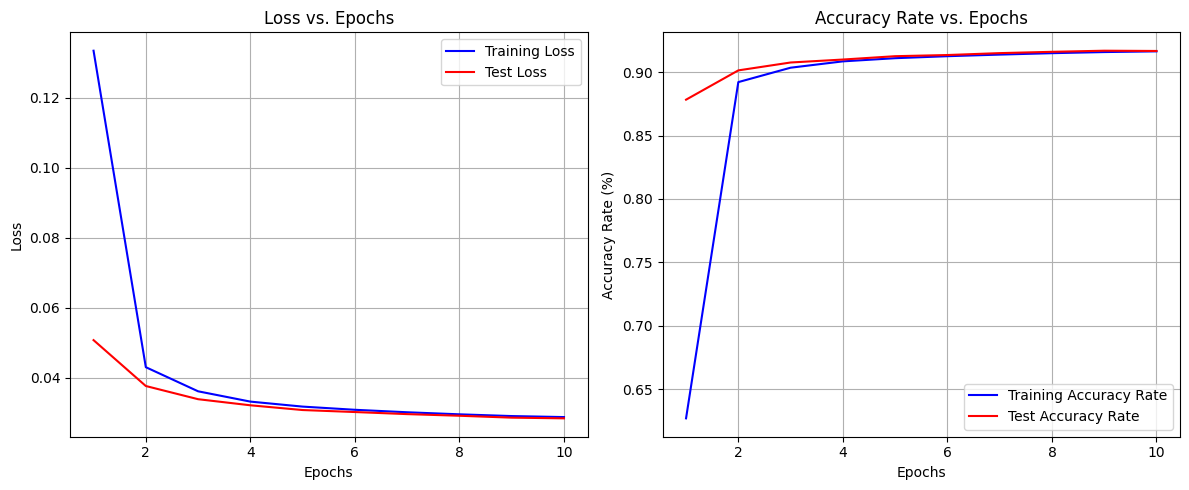

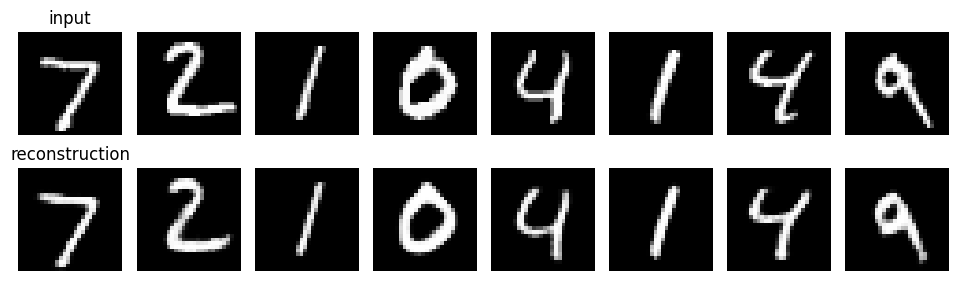

Saved model: Ex2_Q1_b_big_latent_dimension_16_base_c=16_d_latent=16.pt
Final validation loss: 0.0285

Validation L1 losses: {'small_latent_dimension_4': 0.0829, 'small_latent_dimension_16': 0.0514, 'big_latent_dimension_4': 0.0626, 'big_latent_dimension_16': 0.0285}


In [38]:
VALS = {}
configs = {"small_latent_dimension_4": (4,4), "small_latent_dimension_16":(4,16),
           "big_latent_dimension_4"  : (16,4),"big_latent_dimension_16" :(16,16)}

for tag, (base_c, d_latent) in configs.items():
    print(f"\n=== Training {tag} (base_channel_count (base_c)={base_c}, latent_dimension (d_latent)={d_latent}) ===")
    model = ConvolutionalAutoencoder(base_c, d_latent)
    final_validation_loss, training_loss_history, validation_loss_history, training_accuracy_history, validation_accuracy_history = train_autoencoder_model(
        model,
        train_dataset,
        test_dataset,
        epochs=10,
        learning_rate=2e-3,
        weight_decay=0,
        device=None
    )
    VALS[tag] = round(final_validation_loss, 4)
    plot_training_curves(training_loss_history, validation_loss_history, training_accuracy_history, validation_accuracy_history)
    show_reconstructions(model, test_dataset)
    torch.save(model.state_dict(), os.path.join(models_root_dir, f"Ex2_Q1_b_{tag}_base_c={base_c}_d_latent={d_latent}.pt"))
    print(f"Saved model: Ex2_Q1_b_{tag}_base_c={base_c}_d_latent={d_latent}.pt")
    print(f"Final validation loss: {final_validation_loss:.4f}")

print("\nValidation L1 losses:", VALS)

**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

```python
def train_autoencoder_model(model, train_data_loader, validation_data_loader,
               epochs=10, learning_rate=2e-3, weight_decay=0, device=None, 
               pixel_accuracy_threshold=0.1, print_every=5):
    """
    Train an autoencoder model using the provided data loaders.
    
    Args:
        model: The autoencoder model to train
        train_data_loader: DataLoader containing training data
        validation_data_loader: DataLoader containing validation data
        epochs: Number of training epochs
        learning_rate: Learning rate for the optimizer
        weight_decay: L2 regularization strength
        device: Device to use for training ('cuda' or 'cpu')
        pixel_accuracy_threshold: Threshold for considering a pixel accurately reconstructed
        print_every: Print progress every N epochs
        
    Returns:
        final_validation_loss: Final L1 loss on validation set
        training_loss_history: List of L1 losses for each epoch on training set
        validation_loss_history: List of L1 losses for each epoch on validation set
        training_accuracy_history: List of reconstruction accuracies for each epoch on training set
        validation_accuracy_history: List of reconstruction accuracies for each epoch on validation set
    """
    # Use GPU if available and not explicitly specified
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Initialize loss and accuracy history trackers
    training_loss_history = []
    validation_loss_history = []
    training_accuracy_history = []
    validation_accuracy_history = []

    # Set upsampling_stack optimizer and loss criterion
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.L1Loss()

    for epoch in range(1, epochs + 1):
        # Set model to training mode
        model.train()
        epoch_start_time = time.time()
        epoch_training_loss = 0.0
        epoch_training_accuracy = 0.0
        num_training_pixels = 0

        # Training loop
        for input_batch, _ in train_data_loader:
            # Move data to device
            input_batch = input_batch.to(device, non_blocking=True)
            
            # Forward pass
            reconstructed_batch = model(input_batch)
            batch_loss = criterion(reconstructed_batch, input_batch)
            
            # Calculate pixel-wise accuracy (percentage of pixels within threshold)
            pixel_error = torch.abs(reconstructed_batch - input_batch)
            accurate_pixels = (pixel_error < pixel_accuracy_threshold).float().sum().item()
            total_pixels = input_batch.numel()
            
            # Backward pass
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()
            
            # Accumulate batch statistics
            epoch_training_loss += batch_loss.item()
            epoch_training_accuracy += accurate_pixels
            num_training_pixels += total_pixels
            
        # Calculate average metrics for the epoch
        epoch_training_loss /= len(train_data_loader)
        epoch_training_accuracy = epoch_training_accuracy / num_training_pixels
        
        # Store history
        training_loss_history.append(epoch_training_loss)
        training_accuracy_history.append(epoch_training_accuracy)

        # ---------- validation ----------
        # Set model to evaluation mode
        model.eval()
        with torch.no_grad():
            # Initialize validation metrics
            epoch_validation_loss = 0.0
            epoch_validation_accuracy = 0.0
            num_validation_pixels = 0
            
            # Validation loop
            for input_data, _ in validation_data_loader:
                input_data = input_data.to(device)
                reconstructed_data = model(input_data)
                
                # Calculate loss
                val_batch_loss = criterion(reconstructed_data, input_data)
                epoch_validation_loss += val_batch_loss.item()
                
                # Calculate pixel-wise accuracy
                val_pixel_error = torch.abs(reconstructed_data - input_data)
                val_accurate_pixels = (val_pixel_error < pixel_accuracy_threshold).float().sum().item()
                val_total_pixels = input_data.numel()
                
                epoch_validation_accuracy += val_accurate_pixels
                num_validation_pixels += val_total_pixels
            
            # Calculate average validation metrics
            epoch_validation_loss /= len(validation_data_loader)
            epoch_validation_accuracy = epoch_validation_accuracy / num_validation_pixels
            
            # Store history
            validation_loss_history.append(epoch_validation_loss)
            validation_accuracy_history.append(epoch_validation_accuracy)

        # Print progress only every print_every epochs or on the last epoch
        epoch_duration = time.time() - epoch_start_time
        if epoch % print_every == 0 or epoch == epochs or epoch == 1:
            print(f"[{epoch:02d}/{epochs}]  "
                  f"train L1={epoch_training_loss:.4f}  "
                  f"train accuracy={epoch_training_accuracy:.4f}  "
                  f"validation L1={epoch_validation_loss:.4f}  "
                  f"validation accuracy={epoch_validation_accuracy:.4f}  "
                  f"({epoch_duration:.1f}s)")
              
    final_validation_loss = epoch_validation_loss
    final_validation_accuracy = epoch_validation_accuracy
    
    return (final_validation_loss, training_loss_history, validation_loss_history, 
           training_accuracy_history, validation_accuracy_history)
```

#### c
Explore the loss you get for d=4/16, and rationalize it in your report.

We trained four different autoencoder configurations, varying the latent dimension (`d=4` or `d=16`) and the base number of channels in the encoder (`base_channel_count = 4` or `16`). The results are summarized in the table below:

| Configuration                | Base Channels | Latent Dim | Validation L1 Loss |
| ---------------------------- | ------------- | ---------- | ------------------ |
| small\_latent\_dimension\_4  | 4             | 4          | 0.0830             |
| small\_latent\_dimension\_16 | 4             | 16         | 0.0503             |
| big\_latent\_dimension\_4    | 16            | 4          | 0.0620             |
| big\_latent\_dimension\_16   | 16            | 16         | 0.0281             |

Increasing the latent dimension from 4 to 16 consistently improves reconstruction quality, regardless of the channel count. This is because a higher-dimensional latent space allows the network to retain more information from the original input, leading to sharper and more faithful reconstructions. While increasing the base channel count from 4 to 16 also reduces the loss, the effect is slightly less pronounced than increasing the latent dimension.

The combination of both a large latent space and a richer feature extraction backbone (base=16, d=16) produced the best results, achieving a validation L1 loss of 0.0281. In contrast, the smallest configuration (base=4, d=4) resulted in a loss nearly three times higher. This shows that both the capacity to encode fine details and the ability to extract rich features are important for effective reconstruction. A latent dimension of 4 acts as a very tight bottleneck and leads to noticeable information loss, while a latent dimension of 16 seems to offer a good trade-off between compactness and quality.

Overall, the experiments confirm that increasing either model width or latent dimensionality improves reconstruction, but the latent space size has the stronger impact.

#### d
Describe and explain the network architecture you choose for this particular data (stride factors / #layers / #filters in each layer / non-linearity used).

REDO

**Encoder**  
*(compresses the original 28×28 image into a compact latent vector)*

- **3 Convolutional Layers** *(extract features and reduce spatial dimensions gradually)*:
  - Layer 1:  
    - **Filters**: from 1 → `channels_level_1` (`base_c`) channels *(learn basic features like edges)*  
    - **Kernel size**: 3×3 *(looks at local 3×3 pixel patches)*  
    - **Stride**: 2 *(reduces image from 28×28 to 14×14)*  
    - **Activation**: ReLU *(introduces non-linearity)* + Batch Normalization *(stabilizes training)*

  - Layer 2:  
    - **Filters**: from `channels_level_1` (`base_c`) → `channels_level_2` (`2×base_c`) *(learn more complex patterns)*  
    - **Kernel size**: 3×3 *(local feature extraction)*  
    - **Stride**: 2 *(reduces image from 14×14 to 7×7)*  
    - **Activation**: ReLU *(non-linearity)* + Batch Normalization *(training stability)*

  - Layer 3:  
    - **Filters**: from `channels_level_2` (`2×base_c`) → `channels_level_3` (`4×base_c`) *(captures rich details)*  
    - **Kernel size**: 3×3 *(local features)*  
    - **Stride**: 2 *(reduces image from 7×7 to 4×4)*  
    - **Activation**: ReLU *(non-linearity)* + Batch Normalization *(training stability)*

- **Linear (fully connected) Layer** *(compresses features into compact form)*:  
  - Converts the final convolutional features (size: `4×4×4×base_c`) into a small latent vector of dimension **d**.

**Decoder**  
*(reconstructs the original 28×28 image from the latent vector, by mirroring the encoder steps)*

- **Linear (fully connected) Layer** *(expands compressed latent vector back into feature maps)*:  
  - Converts latent vector (**d** dimensions) back to feature maps (`4×4×4×base_c`).

- **3 Transposed Convolutional Layers** *(also called deconvolutions, to reconstruct and upscale the image)*:
  - Layer 1:  
    - **Filters**: from `channels_level_3` (`4×base_c`) → `channels_level_2` (`2×base_c`) *(reverses encoding step, reconstructing features)*  
    - **Kernel size**: 3×3 *(fills in local details)*  
    - **Stride**: 2 *(upscales from 4×4 to 7×7)*  
    - **Activation**: ReLU *(non-linearity)* + Batch Normalization *(training stability)*

  - Layer 2:  
    - **Filters**: from `channels_level_2` (`2×base_c`) → `channels_level_1` (`base_c`) *(refines details further)*  
    - **Kernel size**: 3×3 *(local details)*  
    - **Stride**: 2 *(upscales from 7×7 to 14×14)*  
    - **Activation**: ReLU *(non-linearity)* + Batch Normalization *(training stability)*

  - Layer 3 *(output layer)*:  
    - **Filters**: from `channels_level_1` (`base_c`) → 1 *(final grayscale output)*  
    - **Kernel size**: 3×3 *(final reconstruction detail)*  
    - **Stride**: 2 *(upscales from 14×14 to original 28×28)*  
    - **Activation**: Sigmoid *(ensures final pixel values are between 0 and 1, matching original image)*

**Choice Rationale**

- **Stride of 2**:  
  - Encoder: reduces spatial dimensions by half each step, capturing increasingly abstract features.  
  - Decoder: precisely mirrors encoder, smoothly reconstructing images by doubling spatial dimensions.

- **Kernel size of 3×3**: captures local details effectively while remaining computationally efficient.

- **Channel doubling (base_c, 2×base_c, 4×base_c)**: progressively learns more complex features at each encoding step, enhancing reconstruction quality.

- **ReLU + BatchNorm**: ReLU introduces flexibility (non-linearity) to learn complex patterns, while BatchNorm stabilizes and accelerates training.

- **Sigmoid output**: produces final outputs in the valid range [0, 1], directly matching the original MNIST pixel scale.

- **L1 loss (mean absolute error)**: chosen specifically because it clearly preserves the sharp edges and key details of digits, whereas L2 loss (mean squared error) would smooth reconstructions and reduce visual clarity.

This structured design effectively captures essential digit features, compresses them efficiently, and reconstructs high-quality images clearly from the compressed latent representation.

The best practice of implementing this code is by defining separate encoder and decoder models, both inheriting from nn.module. Use a mean L1 error to define the reconstruction loss.

### 2
**Classifier**. Use the same architecture as the encoder in Q1 in order to define a classification network by combining it with a single-layered MLP network that will map the latent space into a 10 (digits) class prediction. Train this network to predict the digit classes using cross-entropy loss in two scenarios:

In [39]:
from torchvision import datasets

dataset_train = datasets.MNIST(root=".", train=True, download=True, transform=transforms.ToTensor())
dataset_test = datasets.MNIST(root=".", train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=True)

#### (i)
over the entire training set

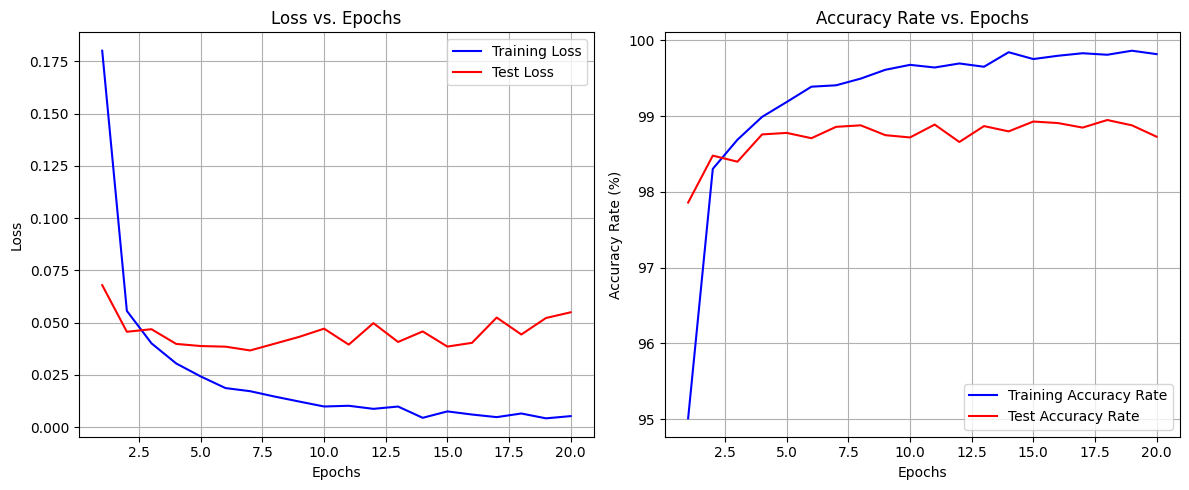

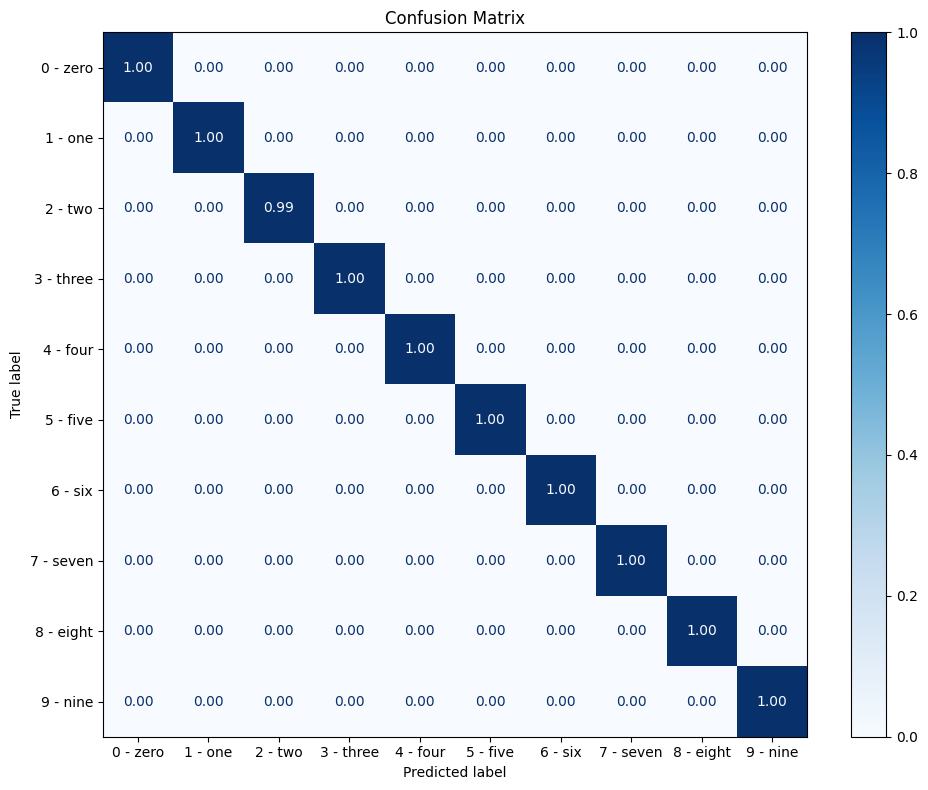

In [40]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
latent_dim = 16
channels_count = 16
num_epochs = 20
learning_rate = 1e-3

model = MLPClassifier(channels_count, latent_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_loader, test_loader = get_mnist_loaders(batch_size=64)
trained_model, train_losses, train_accuracies, test_losses, test_accuracies = train_MLP_model(
    model,
    train_loader, 
    test_loader, 
    criterion, 
    optimizer, 
    num_epochs
  )

torch.save(model.state_dict(), os.path.join(models_root_dir, 'Ex2_Q2_I_latentclassifier.pt'))

plot_training_curves(train_losses, test_losses, train_accuracies, test_accuracies)
plot_sklearn_confusion_matrix(model, train_loader, normalize='true', class_names=train_loader.dataset.classes)

**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

```python

def train_MLP_model(model, dataloader, test_dataloader, criterion, optimizer,
                num_epochs, print_every=5):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = model.to(device)
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in tqdm.tqdm(range(num_epochs)):
        model.train()

        running_loss = 0.0
        total_labels = 0
        correct_preds = 0

        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            logits = model(inputs)
            loss = criterion(logits, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            total_labels += inputs.size(0)
            correct_preds += (torch.softmax(logits, dim=1).argmax(dim=1) == labels).sum().item()

        epoch_loss = running_loss / len(dataloader.dataset)
        epoch_accuracy = (correct_preds / total_labels) * 100

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        test_MLP_model(model, test_dataloader, criterion, test_losses, test_accuracies, epoch, num_epochs)

    return model, train_losses, train_accuracies, test_losses, test_accuracies

def test_MLP_model(model, test_loader, criterion, test_losses, test_accuracies, epoch, num_epochs, print_every=5):
    model.eval()

    running_loss = 0.0
    total_labels = 0
    correct_preds = 0

    with torch.no_grad():
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            logits = model(inputs)
            loss = criterion(logits, labels)
            pred = torch.softmax(logits, dim=1).argmax(dim=1)

            running_loss += loss.item() * inputs.size(0)
            total_labels += inputs.size(0)
            correct_preds += (pred == labels).sum().item()

        running_loss /= len(test_loader.dataset)
        test_accuracy = (correct_preds / total_labels) * 100

        test_losses.append(running_loss)
        test_accuracies.append(test_accuracy)

    return test_losses, test_accuracies
```

#### (ii)
over only 100 random training examples

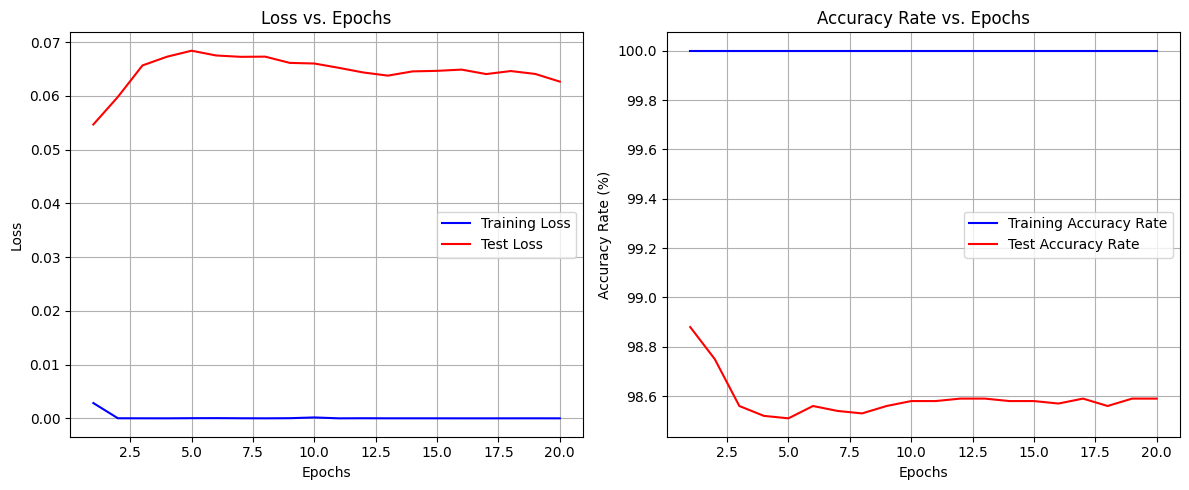

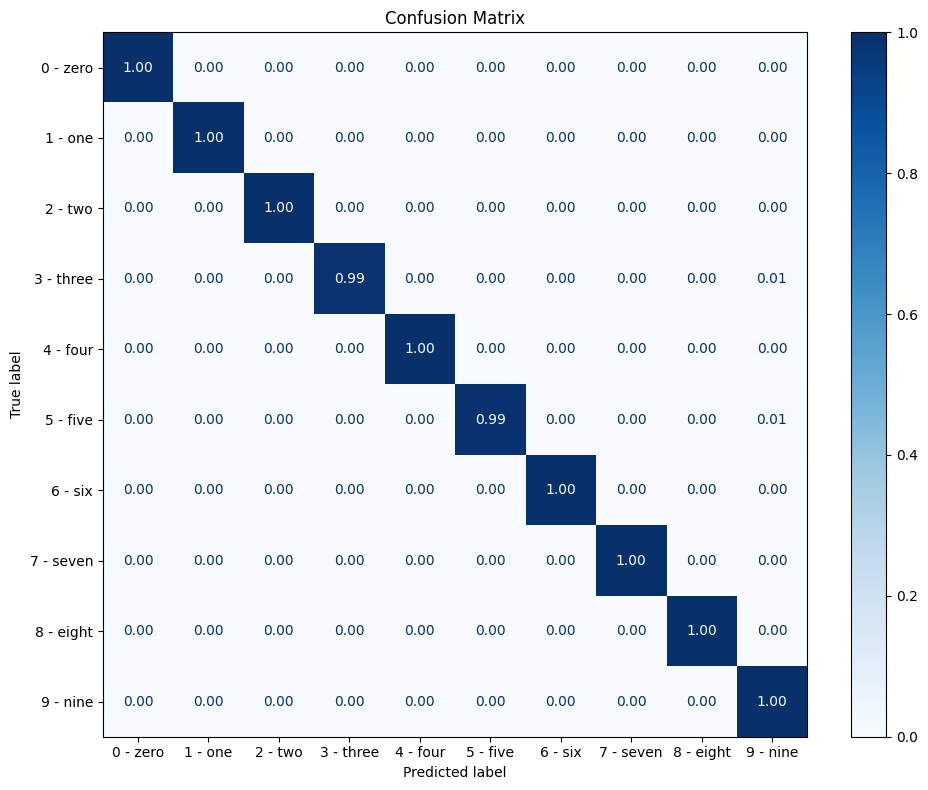

In [41]:
# Sample from the dataset, not the loader
indices = random.sample(range(len(dataset_train)), 100)
train_subset_dataset = Subset(dataset_train, indices)
train_subset_loader = DataLoader(train_subset_dataset, batch_size=10, shuffle=True)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

trained_model, train_losses, train_accuracies, test_losses, test_accuracies = train_MLP_model(
    model, 
    train_subset_loader,
    test_loader,
    criterion,
    optimizer,
    num_epochs
)

torch.save(model.state_dict(), os.path.join(models_root_dir, 'Ex2_Q2_II_latentclassifier_100_random.pt'))

plot_training_curves(train_losses, test_losses, train_accuracies, test_accuracies)
plot_sklearn_confusion_matrix(model, train_loader, normalize='true', class_names=train_loader.dataset.classes)

**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

Same as Q2 I

### 3
**Pre-trained Representation**. Repeat the two tests in Q2, this time by using the unsupervised pre-trained encoder weights from Q1 as a fixed (non-trainable encoder model), and only train the final MLP, once with the entire dataset, once with only 100 random training examples. Plot the training and test errors as well as accuracies. How do they compare to the ones in Q2? Write your conclusion as to the usefulness of unsupervised representation learning.


In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
auto_encoder_state_path = os.path.join(models_root_dir, f"Ex2_Q1_b_big_latent_dimension_16_base_c=16_d_latent=16.pt")
auto_encoder_weights = torch.load(auto_encoder_state_path, map_location=device, weights_only=True)

auto_encoder = ConvolutionalAutoencoder(base_channel_count=16, latent_dimension=16).to(device)
auto_encoder.load_state_dict(auto_encoder_weights)

<All keys matched successfully>

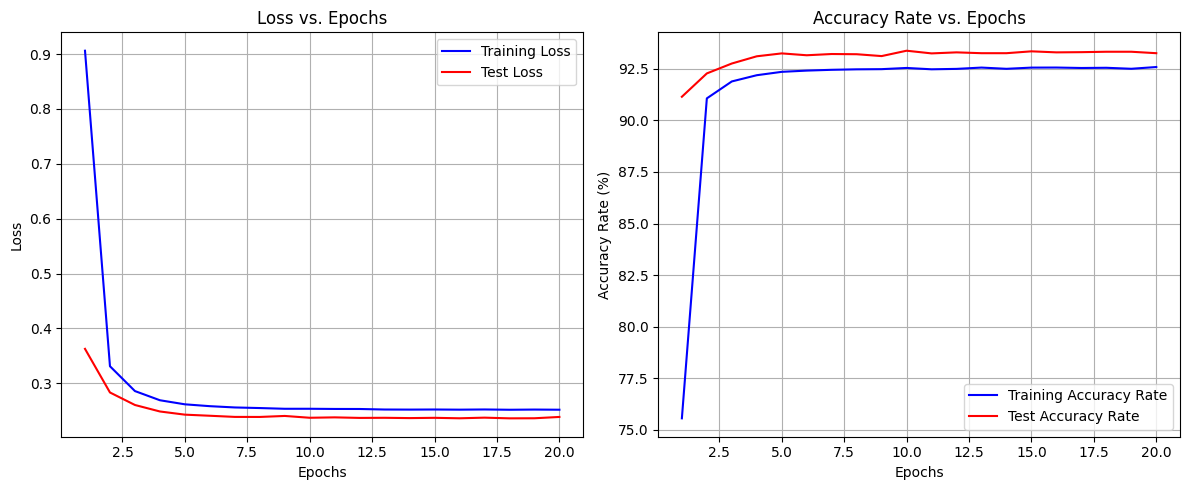

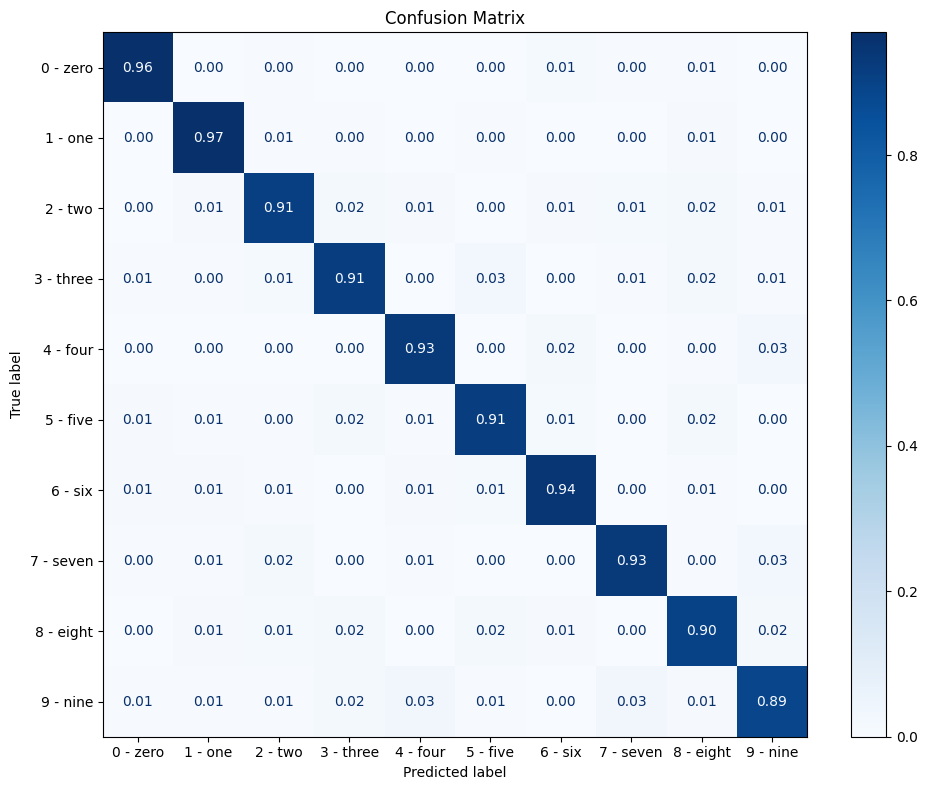

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
latent_dim = 16
channels_count = 16
num_epochs = 20
learning_rate = 1e-3

model = MLPClassifier(channels_count, latent_dim)
model.encoder.load_state_dict(auto_encoder.encoder.state_dict())

# Freeze encoder parameters and train only for the latent2classes layer.
for param in model.encoder.parameters():
    param.requires_grad = False


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classification_layer.parameters(), lr=learning_rate)

trained_model, train_losses, train_accuracies, test_losses, test_accuracies = train_MLP_model(
    model,
    train_loader,
    test_loader,
    criterion,
    optimizer,
    num_epochs
)

plot_training_curves(train_losses, test_losses, train_accuracies, test_accuracies)
plot_sklearn_confusion_matrix(model, train_loader, normalize='true', class_names=train_loader.dataset.classes)

**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

Same as Q2 I

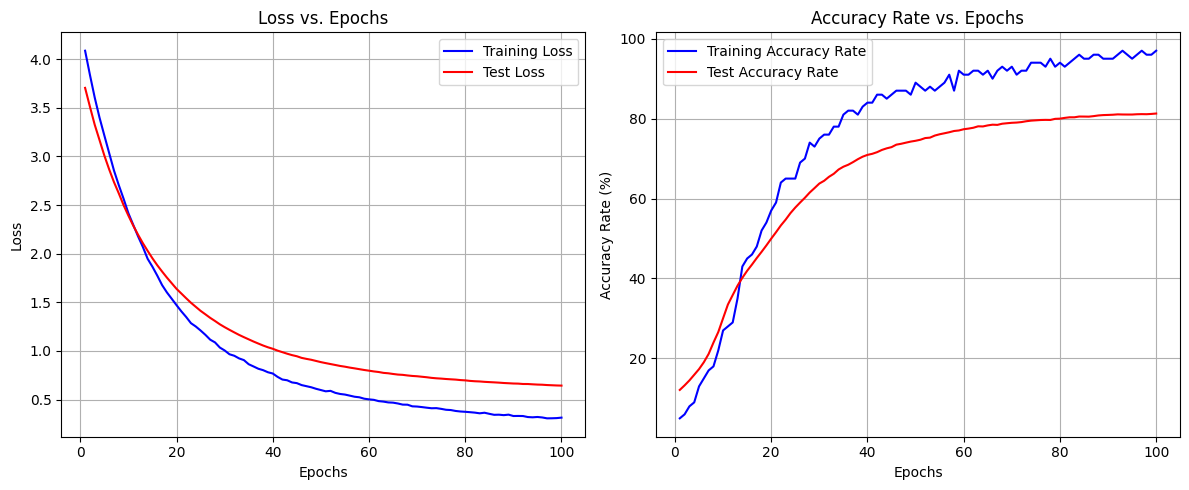

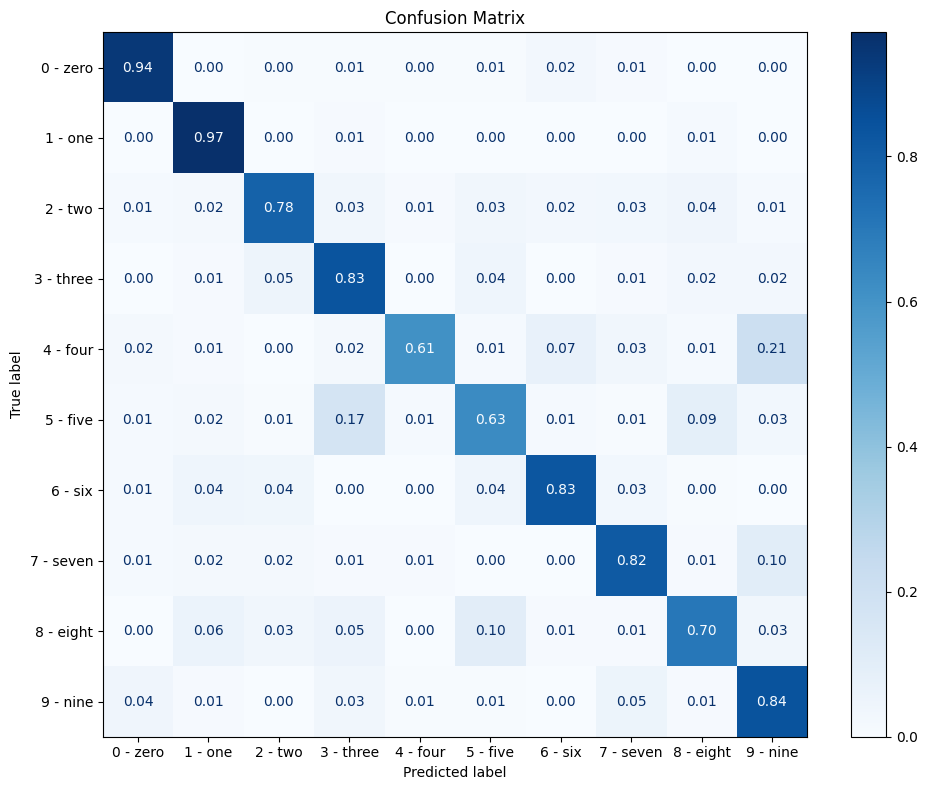

In [44]:
indices = random.sample(range(len(dataset_train)), 100)
train_subset_dataset = Subset(dataset_train, indices)
train_subset_loader = DataLoader(train_subset_dataset, batch_size=10, shuffle=True)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
num_epochs = 100

model = MLPClassifier(channels_count, latent_dim)
model.encoder.load_state_dict(auto_encoder.encoder.state_dict())

# Freeze encoder parameters and train only for the latent2classes layer.
for param in model.encoder.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classification_layer.parameters(), lr=learning_rate)


trained_model, train_losses, train_accuracies, test_losses, test_accuracies = train_MLP_model(
    model,
    train_subset_loader,
    test_loader,
    criterion,
    optimizer,
    num_epochs
)

plot_training_curves(train_losses, test_losses, train_accuracies, test_accuracies)
plot_sklearn_confusion_matrix(model, train_loader, normalize='true', class_names=train_loader.dataset.classes)

**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

Same as Q2 I

#### Conclusion

The results of freezing a pre-trained encoder and training only the final MLP are less accurate compared to training the entire classifer model together.

This is especially problematic in the case of 100 training samples dataset (even though we gave it more epochs to train).

The benefits were clear too, training time took much less than in Q2.

Training just the final MLP layer over the entire dataset seems to have been a sweetspot of pretty decent results for a very small amount of trainable parameters (and pretty short training time)

### 4

**Task Specific Encoding**:
 both Q1 and Q2 produce two different trained encoding networks. The one in Q1 already has a matching trained decoder, but the one in Q2 does not. Use this pretrained encoding network as a fixed (non-trainable model) and train a matching decoder over the entire dataset. Meaning that you are using an encoder trained for classification task, and coupling it with a decoder trained for reconstruction (trained from scratch along with the pretrained encoding/classifying network from Q2). Look at reconstructed images produced by these two sets of encoder-decoder networks and answer:

In [45]:
from mnistlib.models import ConvolutionalAutoencoder, MLPClassifier, Decoder
from mnistlib.data import get_mnist_loaders
from mnistlib.train import train_decoder_only
import os, torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader, val_loader = get_mnist_loaders(batch_size=256)

# Load the whole model state
autoencoder_model = ConvolutionalAutoencoder(16, 16).to(device)
state_dict = torch.load(os.path.join(models_root_dir, "Ex2_Q1_b_big_latent_dimension_16_base_c=16_d_latent=16.pt"), map_location=device)

# Load full state dict
autoencoder_model.load_state_dict(state_dict)

# Now extract just the encoder weights
enc_ae = autoencoder_model.encoder

# Load pretrained Classifier encoder (Q2)
clf = MLPClassifier(16, 16).to(device)
clf.load_state_dict(torch.load(os.path.join(models_root_dir, "Ex2_Q2_I_latentclassifier.pt"), map_location=device))
enc_clf = clf.encoder

# Train fresh decoders for each encoder
dec_ae = Decoder(16, 16).to(device)
dec_clf = Decoder(16, 16).to(device)

print("Training decoder...")
dec_ae = train_decoder_only(dec_ae, enc_ae, train_loader, val_loader, epochs=10)

print("Training decoder...")
dec_clf = train_decoder_only(dec_clf, enc_clf, train_loader, val_loader, epochs=10)


Training decoder...
[01/10] train L1=0.1223  validation L1=0.0422
[05/10] train L1=0.0298  validation L1=0.0296
[10/10] train L1=0.0283  validation L1=0.0278
Training decoder...
[01/10] train L1=0.1740  validation L1=0.0904
[05/10] train L1=0.0734  validation L1=0.0719
[10/10] train L1=0.0689  validation L1=0.0681


**Training-loop snippet (reference only, from `mnistlib/train.py`)**:

```python
def train_decoder_only(decoder, encoder, train_loader, val_loader,
                      epochs=10, lr=2e-3, weight_decay=0,
                      device=None, print_every=5):
    """
    Train a decoder to reconstruct images from a fixed encoder.
    """
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device).eval()
    decoder.to(device).train()

    opt  = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=weight_decay)
    crit = nn.L1Loss()

    for ep in range(1, epochs+1):
        # --- TRAIN ---
        running = 0.0
        for x,_ in train_loader:
            x = x.to(device)
            with torch.no_grad(): z = encoder(x)
            xr = decoder(z)
            loss = crit(xr, x)
            opt.zero_grad(); loss.backward(); opt.step()
            running += loss.item()
        running /= len(train_loader)

        # --- VALIDATE ---
        val_loss = 0.0
        decoder.eval()
        with torch.no_grad():
            for x,_ in val_loader:
                x = x.to(device)
                z = encoder(x)
                xr = decoder(z)
                val_loss += crit(xr, x).item()
        val_loss /= len(val_loader)
        decoder.train()

        if ep==1 or ep%print_every==0 or ep==epochs:
            print(f"[{ep:02d}/{epochs}] train L1={running:.4f}  validation L1={val_loss:.4f}")
    return decoder
```

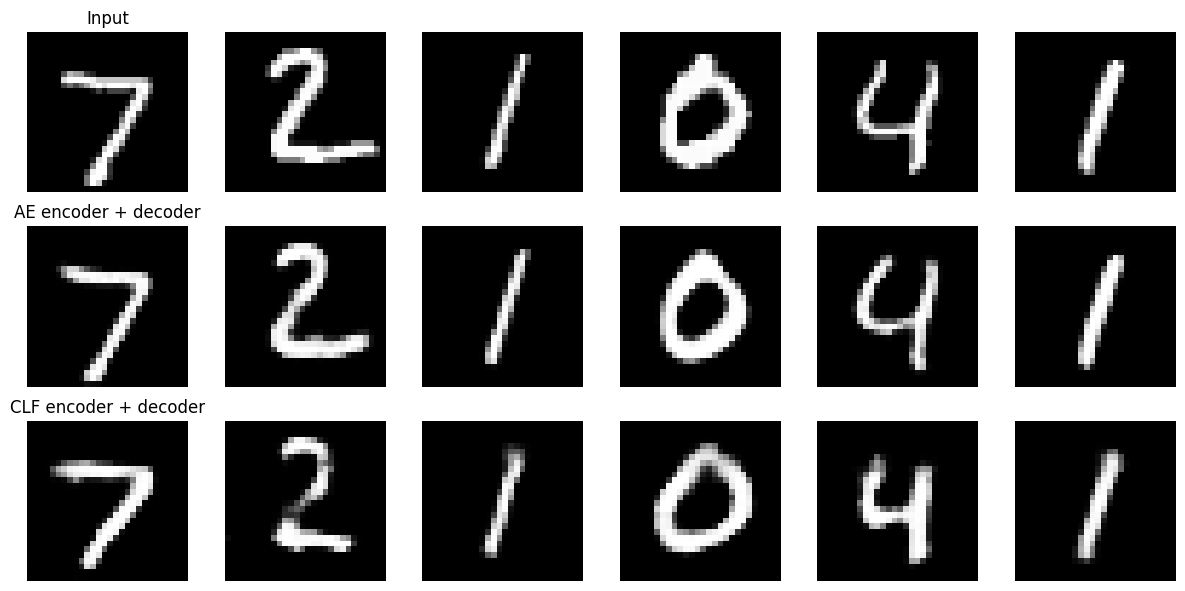

In [46]:
from mnistlib.viz import compare_reconstructions
compare_reconstructions(enc_ae, dec_ae, enc_clf, dec_clf, val_loader)

In [47]:
from mnistlib.train import compute_batch_l1_loss

ae_err  = compute_batch_l1_loss(enc_ae, dec_ae, val_loader)
clf_err = compute_batch_l1_loss(enc_clf, dec_clf, val_loader)

print(f"Batch L1 error: AE-encoder+dec = {ae_err:.4f}, CLF-encoder+dec = {clf_err:.4f}")

Batch L1 error: AE-encoder+dec = 0.0271, CLF-encoder+dec = 0.0651


#### a
Which one results in better reconstruction error and why?

The autoencoder encoder (Q1) results in better reconstruction error. Its decoder reaches an L1 validation loss which is smaller, while the classifier encoder (Q2) + new decoder reaches a higher value.
This is expected, because Q1's encoder was explicitly trained for reconstruction, while Q2's encoder is optimized for classification — it learns features that help with separating classes, not necessarily reconstructing fine pixel details.

#### b
Describe the qualitative differences between the reconstructed results they produce. Explain why you think these are the differences.

Reconstructions from Q1 are smoother and retain digit shape and brightness more accurately.
Q2’s reconstructions tend to be blobby, sometimes lose sharp edges, or blur parts of digits.

That’s because the classifier encoder encodes the information most useful for predicting labels, not for reconstructing the full image — it discards irrelevant visual details.

#### c
Where do you see higher in-class (per-digit) variability? (watch and show multiple instances of the same digit to answer this)

The CLF+decoder has higher in-class variability (two 7s look very different).
Since its latent space was not optimized to compress digits into consistent patterns, the decoder receives more varied or noisy inputs, and struggles to unify them into consistent shapes.

#### d
Where do you see higher inter-class (between digits) distance/separation? Explain both.

The classifier encoder (Q2) has higher inter-class separation. Each digit class is mapped more distinctly in latent space — that’s its goal.
In contrast, Q1’s latent space emphasizes reconstruction similarity, so some digits that look similar (e.g. 3 and 8) may be closer, even if they belong to different classes.

In [48]:
%%bash
pip freeze > requirements.txt
echo "Requirements saved to requirements.txt"

Requirements saved to requirements.txt


## Theoretical Questions

### 1
**LTI.** Show that a convolution with respect to any filter $h$ is time/space invariant.

Let $h[n]$ be a convolution. For a given sequence $x[n]$, the output is:
$$y[n] = (x * h)[n] = \sum_{m=-\infty}^{\infty} x[n-m] h[m]$$
For a time-shifted input $$x[n-n_0]$$, the output becomes:
$$y_{shifted}[n] = \sum_{m=-\infty}^{\infty} x[n-m-n_0] h[m]$$
Let $$p = n-n_0$$, which means $$n = p+n_0$$ We get:
$$y_{shifted}[n] = \sum_{m=-\infty}^{\infty} x[(p+n_0)-m-n_0] h[m]$$
$$y_{shifted}[n] = \sum_{m=-\infty}^{\infty} x[p-m] h[m]$$
Which is by definition the convolution around point $$p$$. This is equivalent to:
$$y_{shifted}[n] = (x * h)[p] = (x * h)[n-n_0] = y[n-n_0]$$
Therefore, we have shown that:
$$y_{shifted}[n] = y[n-n_0]$$


### 2.
**TI.** Explain whether each of the following layers are time/space invariant or not:

#### a) Additive constant

**Yes**: for any shifted input $x[n-n_0]$, the output is simply the shifted input plus the constant. This operation preserves the shift.

#### b) Pointwise nonlinearity (such as ReLU)

**Yes**: pointwise functions are applied to each element independently. So the output of ReLU on a shifted input equals the shifted output of the original input.

#### c) Strided pooling by a factor > 1

**No**: strided pooling of a factor > 1 means we downsample, thus discard information in a grid-dependent way. A shift determines which elements are pooled together, so the shifted input does not necessarily equal the shifted output of the original input.

#### d) As a result, is a CNN composed of all these operators (+convolution) time invariant?

**No**: The CNN contains non-invariant components (strided pooling > 1).

### 3.
**Layers’ Jacobian.** Calculate the Jacobian matrix of the following layers:

#### a) Additive bias vector

Let's define the operation of adding a bias vector b to an input vector x:
$$y = f(x) = x + b$$

where x and b are vectors of dimension n, and b is a fixed parameter.

The Jacobian matrix is defined as:
$$J_{ij} = \frac{\partial y_i}{\partial x_j}$$

For the bias addition operation:
$$\frac{\partial y_i}{\partial x_j} = \frac{\partial (x_i + b_i)}{\partial x_j}$$

When i = j:
$$\frac{\partial y_i}{\partial x_i} = \frac{\partial (x_i + b_i)}{\partial x_i} = 1$$

When i ≠ j:
$$\frac{\partial y_i}{\partial x_j} = \frac{\partial (x_i + b_i)}{\partial x_j} = 0$$

Therefore, the Jacobian matrix of the bias addition operation is:
$$J = I_n$$

where I_n is the identity matrix of size n×n. This makes sense because adding a bias is a simple translation that doesn't change the rate of change with respect to the input.

#### b) General Matrix multiplication

Consider the operation of multiplying an input vector x of dimension n by a weight matrix W of dimension m×n:
$$y = f(x) = Wx$$

where y is the output vector of dimension m.

The i-th component of y is:
$$y_i = \sum_{k=1}^{n} W_{ik} x_k$$

The Jacobian matrix element $J_{ij}$ is:
$$J_{ij} = \frac{\partial y_i}{\partial x_j} = \frac{\partial}{\partial x_j} \sum_{k=1}^{n} W_{ik} x_k = W_{ij}$$

Therefore, the Jacobian matrix of the matrix multiplication operation is simply the weight matrix W itself:
$$J = W$$

This shows that W not only defines the linear transformation but also directly represents how changes in the input affect changes in the output.

#### c) Convolution layer

For a 1D convolution operation with a filter h of length $K$ applied to an input $x$ of length $n$, producing an output $y$ of length $m$ (assuming appropriate padding), we have:
$$y_i = \sum_{k=0}^{K-1} h_k x_{i+k-\lfloor K/2 \rfloor}$$

where $⌊K/2⌋$ accounts for zero padding that keeps the output centered.

The Jacobian matrix element $J_{ij}$ is:
$$J_{ij} = \frac{\partial y_i}{\partial x_j}$$

Since $y_i$ only depends on $x_j$ if j is within the filter window centered at position $i$:
$$J_{ij} = \begin{cases} 
h_{j-i+\lfloor K/2 \rfloor} & \text{if } i-\lfloor K/2 \rfloor \leq j < i+\lceil K/2 \rceil \\
0 & \text{otherwise}
\end{cases}$$

In matrix form, the Jacobian of a 1D convolution is a Toeplitz matrix (a matrix with constant diagonals), where each row contains the filter coefficients arranged according to their position relative to the central element of the filter.

For a 2D convolution, the Jacobian becomes a block Toeplitz matrix, where each block itself is a Toeplitz matrix. The structure reflects how 2D convolution operations locally connect input pixels to output pixels based on the spatial extent of the filter.

In both cases, the Jacobian reflects the local connectivity pattern of the convolution operation, with non-zero entries only where the filter overlaps with the input when calculating a particular output element.